In [2]:
import numpy as np
import pandas as pd
import os
import datetime
os.getcwd()

from sklearn.model_selection import (
    GridSearchCV,
    KFold,
    train_test_split)
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import Lasso


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    plot_confusion_matrix,
    accuracy_score,
    plot_roc_curve,
    precision_score,
    recall_score,
    RocCurveDisplay
)

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix

In [3]:
#Setting Directory:
os.chdir('C:/Users/Student/Documents/EHR---Team-6-Project')


In [4]:
#Loading datasets

projectdf = pd.read_csv('NewMemYear.csv')

chemo_pats = pd.read_csv('chemo_pats.csv')

In [5]:
chemo_pats['START'] = pd.to_datetime(chemo_pats['START'])

chemo_pats['MemYear'] = chemo_pats['START'].dt.strftime('%Y')

chemo_ohc = chemo_pats[['PATIENT', 'MemYear']].join(pd.get_dummies(chemo_pats['DESCRIPTION'])).groupby(['PATIENT', 'MemYear']).max().reset_index()



In [6]:
projectdf.drop(['emergency', 'inpatient', 'outpatient', 'urgentcare', 'wellness', 'ER_Visits', 'Inpt_Admits'], axis=1, inplace=True)

In [7]:
projectdf = projectdf.groupby(['PATIENT', 'MemYear']).max()

In [8]:
projectdf.reset_index(inplace = True)

In [9]:
# Assess for null values and fill null conditions with '0'
projectdf.isnull().sum()
projectdf.fillna(0, inplace=True)

In [200]:
#Cardiac Event
Y = projectdf['Cardiac Event']
X = projectdf.drop(['PATIENT', 'MemYear', 'Unnamed: 0', 'Cardiac Event', 'Atrial Fibrillation', 'Chronic congestive heart failure (disorder)', 'Coronary Heart Disease', 'Myocardial Infarction', 'Cardiac Arrest', 'DeceasedFlag'], axis=1)

In [1]:
#Afib
Y = projectdf['Atrial Fibrillation']
X = projectdf.drop(['PATIENT', 'MemYear', 'Unnamed: 0', 'Cardiac Event', 'Atrial Fibrillation', 'DeceasedFlag'], axis=1)

NameError: name 'projectdf' is not defined

In [10]:
#CHF
Y = projectdf['Chronic congestive heart failure (disorder)']
X = projectdf.drop(['PATIENT', 'MemYear', 'Unnamed: 0', 'Cardiac Event', 'Chronic congestive heart failure (disorder)', 'DeceasedFlag'], axis=1)

In [163]:
#CHD
Y = projectdf['Coronary Heart Disease']
X = projectdf.drop(['PATIENT', 'MemYear', 'Unnamed: 0', 'Cardiac Event', 'DeceasedFlag','Coronary Heart Disease'], axis=1)

In [201]:
#MI
Y = projectdf['Myocardial Infarction']
X = projectdf.drop(['PATIENT', 'MemYear', 'Unnamed: 0', 'Cardiac Event', 'Myocardial Infarction', 'DeceasedFlag'], axis=1)

In [238]:
#Cardiac Arrest
Y = projectdf['Cardiac Arrest']
X = projectdf.drop(['PATIENT', 'MemYear', 'Unnamed: 0', 'Cardiac Event', 'Cardiac Arrest', 'DeceasedFlag'], axis=1)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [12]:
rfc = RandomForestClassifier(random_state=42)
rfc.get_params()

param_grid = {
            'max_depth': [5, 10, 15, 20, 25],
            'n_estimators': [10, 15, 25, 50, 100],
            'n_jobs': [-1]}

cv = KFold(n_splits=5)


In [13]:
cv_mod = GridSearchCV(rfc, param_grid=param_grid, cv=cv)

In [14]:
gridcv = cv_mod.fit(X_train, Y_train)
gridcv.best_params_

{'max_depth': 5, 'n_estimators': 10, 'n_jobs': -1}

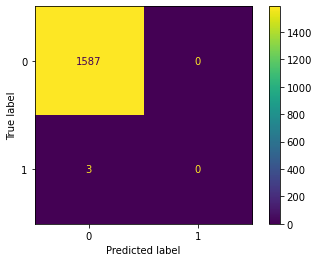

In [243]:
_ = ConfusionMatrixDisplay.from_estimator(gridcv.best_estimator_, X_test, Y_test)

In [244]:
recall_score(Y_test, gridcv.best_estimator_.predict(X_test))

0.0

In [245]:
precision_score(Y_test, gridcv.best_estimator_.predict(X_test))

C:\Users\Student\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [246]:
accuracy_score(Y_test, gridcv.best_estimator_.predict(X_test))

0.9981132075471698

In [247]:
ada = AdaBoostClassifier(random_state=42)
ada.get_params()

param_grid = {
            'learning_rate': [0.5, 0.8, 15],
            'n_estimators': [10, 15, 25, 50, 100],
            'n_jobs': [-1]}

cv = KFold(n_splits=5)


In [248]:
adacv_mod = GridSearchCV(ada, param_grid=param_grid, cv=cv)

In [249]:
adagridcv = cv_mod.fit(X_train, Y_train)
adagridcv.best_params_

{'max_depth': 5, 'n_estimators': 10, 'n_jobs': -1}

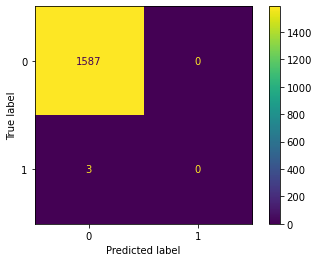

In [250]:
_ = ConfusionMatrixDisplay.from_estimator(adagridcv.best_estimator_, X_test, Y_test)

In [251]:
accuracy_score(Y_test, adagridcv.best_estimator_.predict(X_test))

0.9981132075471698

In [252]:
precision_score(Y_test, adagridcv.best_estimator_.predict(X_test))

C:\Users\Student\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [253]:
recall_score(Y_test, adagridcv.best_estimator_.predict(X_test))

0.0

In [254]:
k_fold = KFold(n_splits=2, shuffle=True, random_state=42) #setting up our number of folds

In [255]:
#logspace-- what power base 10 are we raising to
C_candidates = np.logspace(-2, 0, 20) #Grid of 20 points between 10^-2 and 10^0 (which is 1)
gamma_candidates = np.logspace(-2, 1, 20) #Grid of 20 points between 10^-2 and 10^1 (which is 10)

In [256]:
svm_pipeline = make_pipeline(StandardScaler(),  
                             SVC(random_state=42))

In [257]:
grid_search_cv = GridSearchCV(svm_pipeline, 
                              dict(svc__C=C_candidates, svc__gamma=gamma_candidates), 
                              cv=k_fold).fit(X_train, Y_train) 

In [258]:
grid_search_cv.best_params_

{'svc__C': 1.0, 'svc__gamma': 0.01}

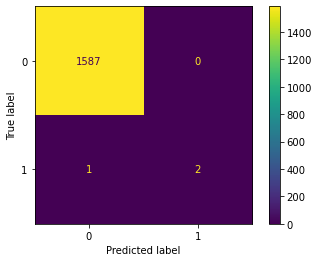

In [259]:
_ = ConfusionMatrixDisplay.from_estimator(grid_search_cv.best_estimator_, X_test, Y_test)

In [260]:
precision_score(Y_test, grid_search_cv.best_estimator_.predict(X_test))

1.0

In [261]:
recall_score(Y_test, grid_search_cv.best_estimator_.predict(X_test))

0.6666666666666666

In [262]:
accuracy_score(Y_test, grid_search_cv.best_estimator_.predict(X_test))

0.9993710691823899

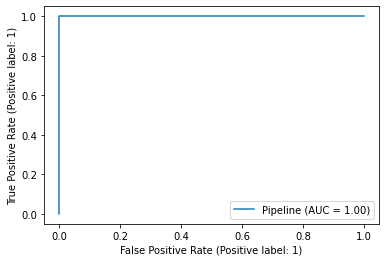

In [263]:
_ = RocCurveDisplay.from_estimator(grid_search_cv.best_estimator_, X_test, Y_test)

In [15]:
#define the value for confusion matrix results
def value_function(y_true, y_pred, tn_value=10, fp_value=-10, fn_value=-100, tp_value=100):
    sum_ = y_pred + y_true
    diff_ = y_pred - y_true
    tn_contrib = tn_value * np.mean((sum_ == 0) & (diff_ == 0))
    fp_contrib = fp_value * np.mean((sum_ == 1) & (diff_ == 1))
    fn_contrib = fn_value * np.mean((sum_ == 1) & (diff_ == -1))
    tp_contrib = tp_value * np.mean((sum_ == 2) & (diff_ == 0))
    return tn_contrib + fp_contrib + fn_contrib + tp_contrib

In [16]:
# Create function for making intervention to patients based on prediction

def intervine_patients(model, X, Y, fp_value=-10, tp_value=100):
    tp_contrib = np.sum((model.predict(X) > 0) & (Y > 0)) * tp_value
    fp_contrib = np.sum((model.predict(X) > 0) & (Y < 1)) * fp_value
    return tp_contrib + fp_contrib

In [17]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize the RFE object with the Random Forest model and the desired number of features to select
rfe = RFE(estimator=rf, n_features_to_select=5)

# Fit RFE to the training data
rfe.fit(X_train, Y_train)

# Get the selected features and their rankings
selected_features = X_train.columns[rfe.support_]
feature_rankings = rfe.ranking_

# Print the selected features and their rankings
for feature, rank in zip(selected_features, feature_rankings):
    print(f"Feature: {feature}, Rank: {rank}")

# Train the Random Forest model on the selected features
rf.fit(X_train[selected_features], Y_train)

# Evaluate the model on the test set
accuracy = rf.score(X_test[selected_features], Y_test)
print(f"Accuracy: {accuracy}")

Feature: white, Rank: 39
Feature: Age, Rank: 59
Feature: Body mass index 30+ - obesity (finding), Rank: 55
Feature: Chronic sinusitis (disorder), Rank: 46
Feature: Hyperlipidemia, Rank: 62
Accuracy: 0.9943396226415094


In [18]:
# Update data with selected feature 
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


In [19]:
# Update model with selected feature
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train_selected, Y_train)

RandomForestClassifier(random_state=42)

In [20]:
# Perform cross-validation and compute accuracy
cv_scores = cross_val_score(rf_selected, X_train_selected, Y_train, cv=5)  # Set the number of folds as desired
mean_accuracy = cv_scores.mean()

print("Cross-Validation Accuracy Scores:")
print(cv_scores)
print("Mean Accuracy:", mean_accuracy)

Cross-Validation Accuracy Scores:
[0.98787062 0.98921833 0.98382749 0.99055331 0.98920378]
Mean Accuracy: 0.9881347054137521


In [21]:
accuracy_score(Y_test, rf_selected.predict(X_test_selected))

0.9943396226415094

In [22]:
precision_score(Y_test, rf_selected.predict(X_test_selected))

0.0

In [23]:
recall_score(Y_test, rf_selected.predict(X_test_selected))

0.0

In [24]:
# Compute the value function for the Random 
rf_y_test = rf_selected.predict(X_test_selected)
rf_value = value_function(Y_test,rf_y_test)

rf_impacts = intervine_patients(rf_selected, X_test_selected, Y_test)

rf_impacts

-10

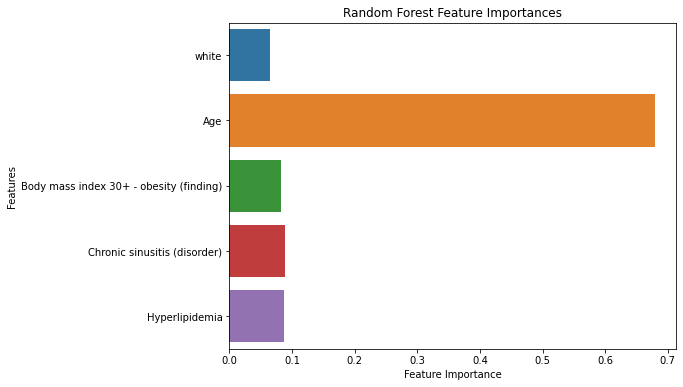

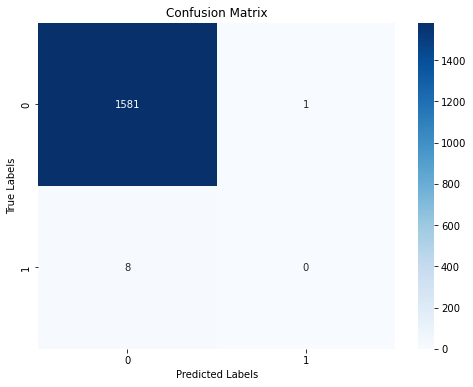

In [25]:
# Visualize feature importances
feature_importances = rf_selected.feature_importances_
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=selected_features)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importances")
plt.show()

# Generate confusion matrix
y_pred = rf_selected.predict(X_test_selected)
cm = confusion_matrix(Y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()